In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Fertilizer Prediction.csv')

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols,num_cols

(['Soil Type', 'Crop Type', 'Fertilizer Name'],
 ['Temparature',
  'Humidity ',
  'Moisture',
  'Nitrogen',
  'Potassium',
  'Phosphorous'])

In [35]:
label_encoder = LabelEncoder()
cat_cols.remove('Fertilizer Name')
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
df[cat_cols].head()


,Soil Type,Crop Type
0,4,3
1,2,8
2,0,1
3,3,9
4,1,6


In [37]:
df['Fertilizer Name'].unique()


array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [38]:
df['Fertilizer Name'] = df['Fertilizer Name'].map(
    {
        'Urea': 0,
        'DAP': 1,
        '14-35-14': 2,
        '28-28': 3,
        '17-17-17': 4,
        '20-20': 5,
        '10-26-26': 6,
    }
)

In [39]:
x = df.iloc[ : , : -1]
y = df.iloc[ : ,-1]

In [40]:
x.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [41]:
y.head()

0    0
1    1
2    2
3    3
4    0
Name: Fertilizer Name, dtype: int64

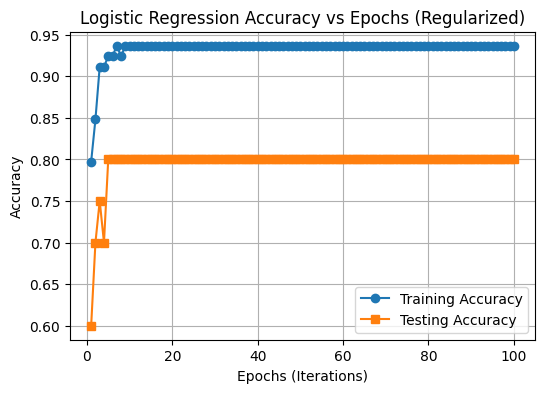

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



# Step 2: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 3: Initialize model with regularization
C_value = 0.1  # Reduced to prevent overfitting
model = LogisticRegression(C=C_value, max_iter=1, warm_start=True, solver='lbfgs')

# Step 4: Track accuracy over epochs
epochs = 100
train_acc = []
test_acc = []

for epoch in range(epochs):
    model.fit(X_train, y_train)  # Train the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot accuracy
plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), train_acc, marker='o', label='Training Accuracy')
plt.plot(range(1, epochs+1), test_acc, marker='s', label='Testing Accuracy')
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy vs Epochs (Regularized)")
plt.legend()
plt.grid(True)
plt.show()


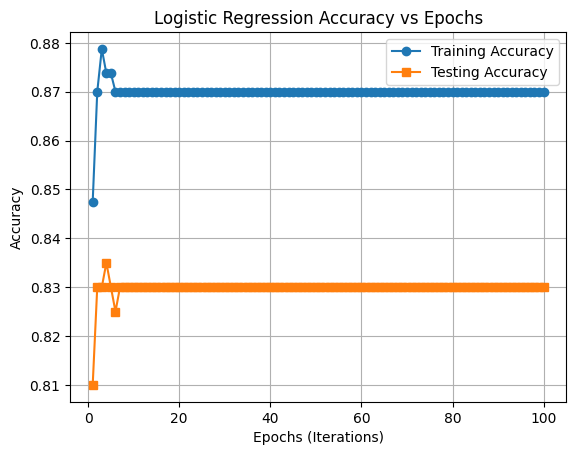

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []
epochs = range(1, 101)  # Simulating 100 iterations

# Training Logistic Regression with different max_iter values
for epoch in epochs:
    model = LogisticRegression(max_iter=epoch, solver='lbfgs')
    model.fit(X_train, y_train)

    # Compute accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs epochs
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs Epochs')
plt.legend()
plt.grid()
plt.show()


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22,random_state = 10)

ValueError: Found input variables with inconsistent numbers of samples: [99, 1000]

In [ ]:
x_test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
19,29,58,52,2,10,13,0,36
14,26,52,31,3,2,14,0,41
43,34,65,60,0,8,35,0,0
37,37,70,37,1,6,12,0,41
66,34,65,57,0,8,9,0,13


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

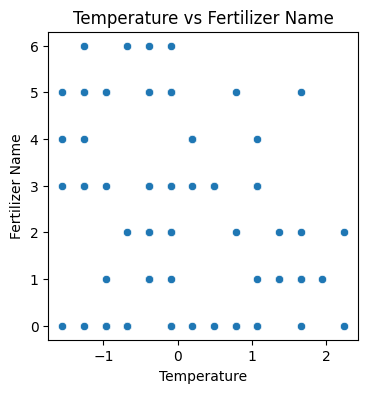

In [ ]:
## for better understanding let us take the variation of temperature with Fertilizer Name
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,4))
sns.scatterplot(x = x_train[:,0],y = y_train)
plt.xlabel('Temperature')
plt.ylabel('Fertilizer Name')
plt.title('Temperature vs Fertilizer Name')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
report = {}
def best_model(models):
    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = list(models.values())[i]
        model.fit(x_train,y_train)
        y_test_pred = model.predict(x_test)
        report[model_name] = accuracy_score(y_test,y_test_pred)
    return report
       


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
models = {
    "RandomForestClassifier" : RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "LogisticRegression" : LogisticRegression(multi_class='multinomial'),
    "SVC" : SVC(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
}   

print(best_model(models))


{'RandomForestClassifier': 0.9545454545454546, 'DecisionTreeClassifier': 1.0, 'LogisticRegression': 0.8636363636363636, 'SVC': 0.9090909090909091, 'KNeighborsClassifier': 0.6363636363636364, 'AdaBoostClassifier': 0.6818181818181818}


In [ ]:
parameters = {
    'penalty' : ['l1','l2','elasticnet'],
    'C' : [0.1,0.5,1,2,5],
    'solver' : ['newton-cg','lbfgs','liblinear'],
    'max_iter' : [100,200,300,400,500]
}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(),param_grid = parameters,scoring='accuracy',cv = 5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr = LogisticRegression(C = 2,max_iter = 100,penalty = 'l2',solver = 'newton-cg')
lr.fit(x_train,y_train)
y_test_pred = lr.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.8636363636363636

In [ ]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         2\n           1       1.00      1.00      1.00         7\n           2       0.80      1.00      0.89         4\n           3       1.00      1.00      1.00         3\n           4       0.00      0.00      0.00         1\n           5       1.00      1.00      1.00         2\n           6       0.50      0.33      0.40         3\n\n    accuracy                           0.86        22\n   macro avg       0.76      0.76      0.76        22\nweighted avg       0.85      0.86      0.85        22\n'

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 1, 0, 1, 0, 1]], dtype=int64)

In [ ]:
lr.predict(scaler.transform([[20,80,100,30,40,20,10,0]]))[0]

4